In [27]:
from astropy.io import ascii
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np
import seaborn as sns
from sqlalchemy import create_engine

from astroquery.simbad import Simbad
from astroquery.mast import Catalogs

from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
#from __future__ import division

from astropy.table import Table, vstack, join, hstack, unique
from astropy import units as u
from astropy.coordinates import SkyCoord


#import MySQLdb
import pymysql
pymysql.install_as_MySQLdb()

In [28]:
# connect to the sacy local mysql DB 
db=pymysql.connect(host="127.0.0.1", user="root",passwd="sacy_db", db="sacy_PELLIOT")
cursor=db.cursor()

In [29]:
# Get all the mass information from SACY sample
# next update will be using mysql quering directly from pandas dataframe

common_id = []
ra_deg = []
dec_deg = []
mass = []
spt = []


try:
    # Create a MySQL query
    sql = ("select distinct common_id, ra_deg, dec_deg, mass, spt from ncomp_tab where mass <> 999;")

    cursor.execute(sql)
    rcount = int(cursor.rowcount)
    
    for r in range(rcount):
        row = cursor.fetchone()
        common_id.append(row[0])
        ra_deg.append(row[1])
        dec_deg.append(row[2])
        mass.append(row[3])
        spt.append(row[4])


except:
    print("Error: unable to fecth data")


# Save the result into a Table
SACY_mass = Table([common_id, ra_deg, dec_deg, mass,spt], 
                  names=('common_id', 'ra_deg', 'dec_deg', 'mass', 'spt'))

SACY_mass_df = SACY_mass.to_pandas()

print('SACY objects: '+str(len(SACY_mass_df)))

#SACY_mass_df

SACY objects: 841


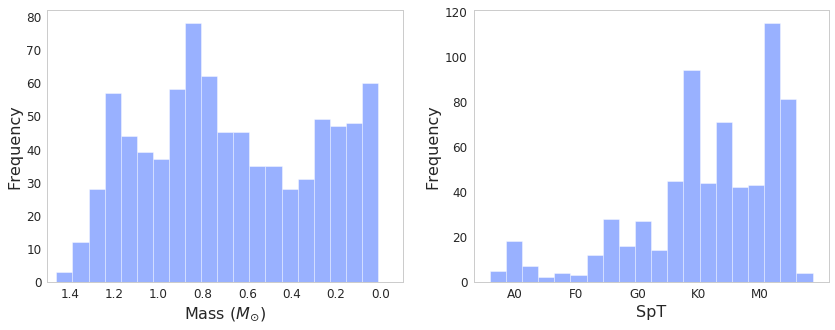

In [48]:
# Plot mass and SpT distribution in SACY using seaborn for the webpage

sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("bright")

plt.subplot(122)
pp = sns.distplot(SACY_mass_df['spt'],kde=False,bins=20)
pp.set_xticks([20,30,40,50,60])
pp.set_xticklabels(['A0','F0','G0','K0','M0'])


plt.xlabel('SpT', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.subplot(121)
pp = sns.distplot(SACY_mass_df['mass'],kde=False,bins=20)
#pp.set_xticks([20,30,40,50,60])
#pp.set_xticklabels(['A0','F0','G0','K0','M0'])


plt.xlabel('Mass $(M_{\odot})$', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xlim(1.5, -0.1)  # decreasing mass

fig = plt.gcf()
fig.set_size_inches(14,5)

fig.savefig("sacy_mass_Spt.png", bbox_inches='tight')

plt.show()